In [1]:
source('helpers.R')

In [2]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

In [4]:
cts = c('CD4+ CAR T','CD8+ CAR T')
target <- subset(prepost, (cell_type %in% cts) & (Day %in% c('D7','D21')) )

In [6]:
muscat.edgeR <- muscat.de.genes(
    seurat_obj = target, 
    cluster_col = 'cell_type', 
    group_col = 'Day', 
    sample_col = 'sample_id', 
    method = 'edgeR'
)

  |======================================================================| 100%

           Num DE.genes % DE.genes
CD4+ CAR T           37      0.101
CD8+ CAR T         1530      4.180


In [7]:
protein_coding <- filter_genes_by_biotype(muscat.edgeR$gene, biotype = "protein_coding")
muscat.edgeR <- muscat.edgeR[muscat.edgeR$gene %in%  c(protein_coding$filtered_genes, 'CAR'),]

In [9]:
genes.up <- c(
  "TOX",     # exhaustion/memory regulator
  "ID2",     # innate-like/differentiation
  "FOXP1",   # T cell differentiation
  "FOXO1",   # memory formation
  "NR3C1",   # glucocorticoid receptor
  "STAT4",   # Th1/cytotoxic program
  "CXCR4",   # tissue retention/trafficking
  "CXCR6",   # tissue residency
  "PIK3R1",  # PI3K regulatory subunit
  "GZMM"     # cytotoxic effector
)

genes.down <- c(
  "SELL",     # lymph node homing
  "BATF3",    # cross-presentation TF
  "STAT5A",   # IL-2 signaling
  "CIITA",    # MHC II transactivation
  "LGALS9",   # immunomodulatory ligand
  "PECAM1",   # adhesion/transmigration
  "NR1H3",    # LXRα nuclear receptor
  "TP53",     # stress checkpoint
  "ADA",      # adenosine metabolism
  "ENO1"      # glycolytic enzyme
)


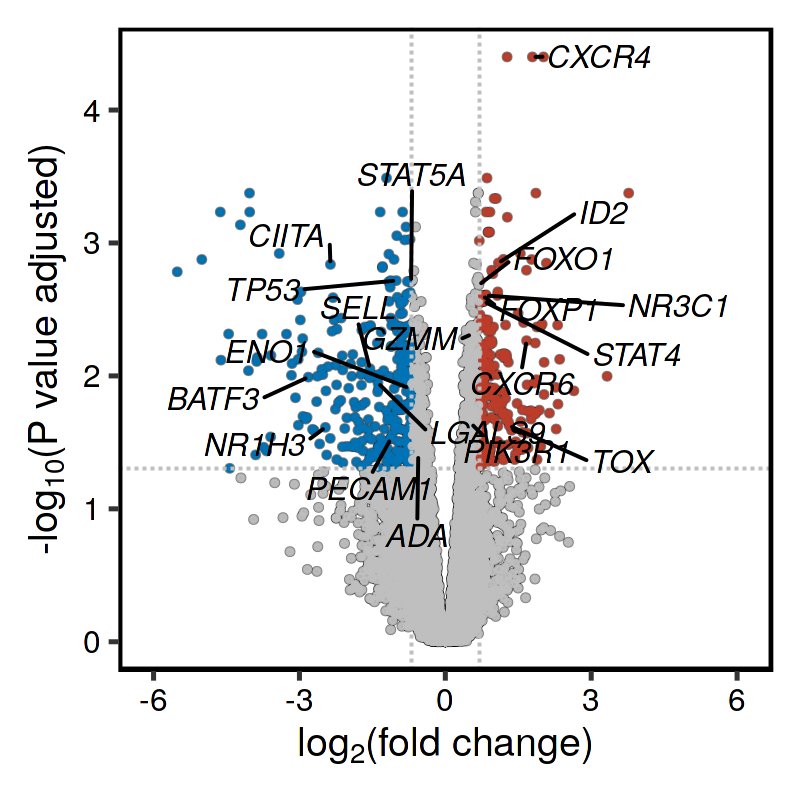

In [11]:
ctype = "CD8+ CAR T"
muscat.edgeR.ctype <- muscat.edgeR %>% 
    filter(cluster_id == ctype) %>% 
    dplyr::select(gene, p_adj.glb, logFC)

rownames(muscat.edgeR.ctype) <- muscat.edgeR.ctype$gene
colnames(muscat.edgeR.ctype) <- c('gene', 'p_val_adj', 'avg_log2FC')

muscat.edgeR.ctype <- muscat.edgeR.ctype %>% dplyr::select(p_val_adj, avg_log2FC)
muscat.edgeR.ctype$avg_log2FC <- muscat.edgeR.ctype$avg_log2FC*-1
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res=200)
p <- do_VolcanoPlot(sample = target, genes.up = genes.up, genes.down = genes.down,
            de_genes = muscat.edgeR.ctype, pt.size=0.6,  min.segment.length=0.01, force=80, nudge_x=1,
            pval_cutoff = 0.05, FC_cutoff = log(2), n_genes = 10, order_tags_by='custom')  
p

In [ ]:
pdf(file.path(panel.path, paste0("2C_D7_vs_D21_",ctype,"_custom.pdf")), width=4, height=4)
p
dev.off()